# Project 1 : Charting with Code

## Preprocessing

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

avocados_df = pd.read_csv('./cali_avocados.csv')
avocados_df.drop([' Commodity Code', ' County Code'],axis=1,inplace=True)
avocados_df

,Year,Crop Name,County,Harvested Acres,Yield,Production,Price P/U,Unit,Value
0,2020,AVOCADOS ALL,Monterey,223,5.56,1240,2379.84,Tons,2951000
1,2020,AVOCADOS ALL,Riverside,3020,,,,Tons,88697000
2,2020,AVOCADOS ALL,San Bernardino,370,2.16,799,2617.02,Tons,2091000
3,2020,AVOCADOS ALL,San Diego,14400,3.51,50500,3028.87,Tons,152958000
4,2020,AVOCADOS ALL,San Luis Obispo,4240,5.9,25000,1886.76,Tons,47169000
...,...,...,...,...,...,...,...,...,...
415,1980,AVOCADOS ALL,San Diego,24820,2.00,49640,1300,TONS,64532000
416,1980,AVOCADOS ALL,San Luis Obispo,737,0.54,398,1930,TONS,768000
417,1980,AVOCADOS ALL,Santa Barbara,5367,5.04,27050,2050,TONS,55452500
418,1980,AVOCADOS ALL,Tulare,1421,1.78,2530,580,TONS,1467000


In [2]:
avocados_df.rename(columns=lambda name: name.strip(), inplace=True)
avocados_df['Unit'] = avocados_df['Unit'].apply(lambda unit: "Tons")
avocados_df['Year'] = avocados_df['Year'].apply(lambda year: int(year))
feature_names = avocados_df.columns
print(f'Feature Names: {feature_names.values}')


for feature in feature_names.values : 
    avocados_df[feature] = avocados_df[feature].apply(lambda name: str(name).strip())
    avocados_df.replace('', 0, inplace=True)
    avocados_df.replace('San Luis Obisp', 'San Luis Obispo', inplace=True)
    if feature in ['Harvested Acres', 'Yield', 'Production', 'Price P/U', 'Value'] :
        avocados_df[feature] = avocados_df[feature].apply(lambda number: float(number))


Feature Names: ['Year' 'Crop Name' 'County' 'Harvested Acres' 'Yield' 'Production'
 'Price P/U' 'Unit' 'Value']


In [3]:
# years = avocados_df.loc[:, 'Year'].unique()
# year_counts = avocados_df.loc[:, 'Year'].value_counts()
# yields = avocados_df.loc[:, 'Yield']
# avocados_by_year = pd.DataFrame(avocados_df.groupby('Year')['Yield'].sum())

print(avocados_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             420 non-null    object 
 1   Crop Name        420 non-null    object 
 2   County           420 non-null    object 
 3   Harvested Acres  420 non-null    float64
 4   Yield            420 non-null    float64
 5   Production       420 non-null    float64
 6   Price P/U        420 non-null    float64
 7   Unit             420 non-null    object 
 8   Value            420 non-null    float64
dtypes: float64(5), object(4)
memory usage: 29.7+ KB
None


In [4]:
avocados_df.head(10)


,Year,Crop Name,County,Harvested Acres,Yield,Production,Price P/U,Unit,Value
0,2020,AVOCADOS ALL,Monterey,223.0,5.56,1240.0,2379.84,Tons,2951000.0
1,2020,AVOCADOS ALL,Riverside,3020.0,0.00,0.0,0.00,Tons,88697000.0
2,2020,AVOCADOS ALL,San Bernardino,370.0,2.16,799.0,2617.02,Tons,2091000.0
3,2020,AVOCADOS ALL,San Diego,14400.0,3.51,50500.0,3028.87,Tons,152958000.0
4,2020,AVOCADOS ALL,San Luis Obispo,4240.0,5.90,25000.0,1886.76,Tons,47169000.0
5,2020,AVOCADOS ALL,Santa Barbara,5770.0,4.89,28200.0,2842.59,Tons,80161000.0
6,2020,AVOCADOS ALL,Ventura,16400.0,4.29,70300.0,2556.57,Tons,179727000.0
7,2019,AVOCADOS ALL,Monterey,225.0,6.58,1480.0,2500.00,Tons,3700000.0
8,2019,AVOCADOS ALL,Riverside,2940.0,5.48,16100.0,2505.53,Tons,40339000.0
9,2019,AVOCADOS ALL,San Bernardino,397.0,3.53,1400.0,2604.29,Tons,3646000.0


In [5]:
avocados_df.tail(10)

,Year,Crop Name,County,Harvested Acres,Yield,Production,Price P/U,Unit,Value
410,1980,AVOCADOS ALL,Kern,240.0,3.28,788.0,500.0,Tons,394000.0
411,1980,AVOCADOS ALL,Los Angeles,710.0,0.70,497.0,1880.0,Tons,934400.0
412,1980,AVOCADOS ALL,Orange,1008.0,1.10,1109.0,1882.0,Tons,2087100.0
413,1980,AVOCADOS ALL,Riverside,5552.0,0.59,3249.0,1250.0,Tons,4060700.0
414,1980,AVOCADOS ALL,San Bernardino,120.0,4.06,487.0,528.0,Tons,257000.0
415,1980,AVOCADOS ALL,San Diego,24820.0,2.00,49640.0,1300.0,Tons,64532000.0
416,1980,AVOCADOS ALL,San Luis Obispo,737.0,0.54,398.0,1930.0,Tons,768000.0
417,1980,AVOCADOS ALL,Santa Barbara,5367.0,5.04,27050.0,2050.0,Tons,55452500.0
418,1980,AVOCADOS ALL,Tulare,1421.0,1.78,2530.0,580.0,Tons,1467000.0
419,1980,AVOCADOS ALL,Ventura,10917.0,0.77,8440.0,1881.0,Tons,15879000.0


## Visualizations

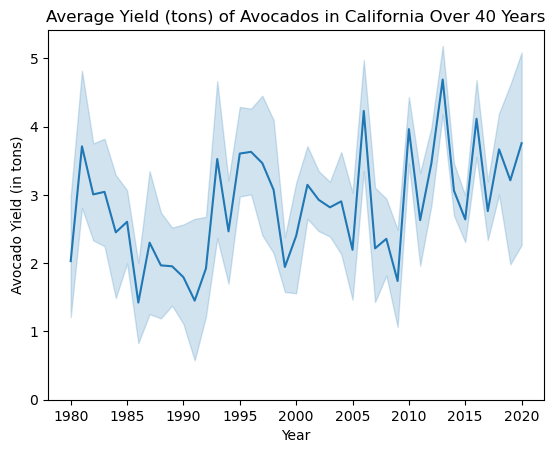

In [6]:
fig, ax = plt.subplots()
ticks = range(9)
tick_years = [1980, 1985, 1990, 1995,
              2000, 2005, 2010, 2015, 2020]

sns.lineplot(data=avocados_df,
            x='Year',
            y='Yield',
            ax=ax)

ax.set_ylim(0, None)
ax.set(ylabel='Avocado Yield (in tons)',
       title="Average Yield (tons) of Avocados in California Over 40 Years",
       xticks=np.arange(0, 45, step=5))

ax.axes.invert_xaxis()

<Figure size 640x480 with 0 Axes>

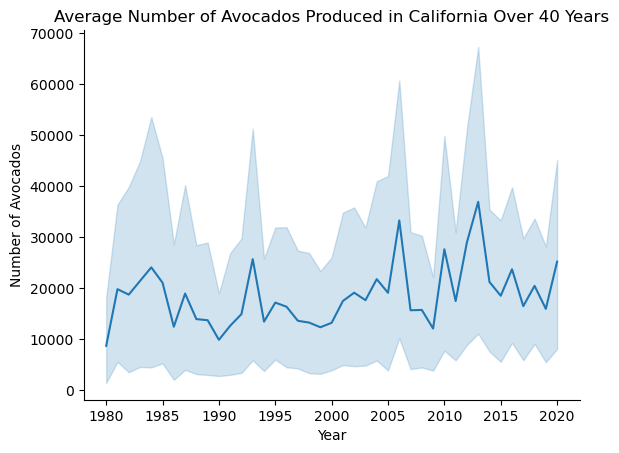

In [7]:
plt.clf()
fig, ax = plt.subplots()

sns.lineplot(data=avocados_df,
            x='Year',
            y='Production')
sns.despine(ax=ax)
ax.set(ylabel='Number of Avocados',
       title='Average Number of Avocados Produced in California Over 40 Years',
       xticks=np.arange(0, 45, step=5))
ax.axes.invert_xaxis()

In [8]:
avocados_df_counties = avocados_df['County'].unique()
avocados_df_counties

array(['Monterey', 'Riverside', 'San Bernardino', 'San Diego',
       'San Luis Obispo', 'Santa Barbara', 'Ventura', 'Sum of Others',
       'Los Angeles', 'Orange', 'Tulare', 'Santa Cruz', 'Butte', 'Fresno',
       'San Benito', 'Stanislaus', 'Kern', 'Santa Clara'], dtype=object)

<Figure size 640x480 with 0 Axes>

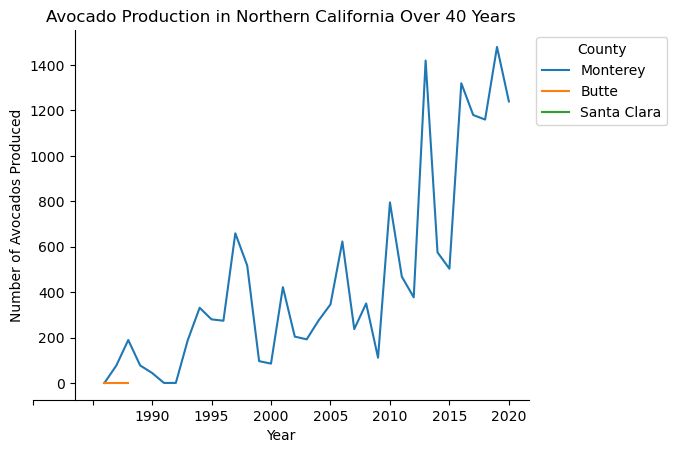

In [9]:
# Northern: Monterey, Butte, Santa Clara
# Central Coast: San Luis Obispo, Stanislaus, Tulare, Santa Cruz, Fresno, San Benito
# Southern: Riverside, San Bernardino, San Diego, Santa Barbara, Ventura, Los Angeles, Orange, Kern
northern_avocado_counties = avocados_df[avocados_df['County'].isin(['Monterey', 'Butte', 'Santa Clara'])]
central_avocado_counties = avocados_df[avocados_df['County'].isin(['San Luis Obispo', 'Stanislaus', 'Tulare', 'Santa Cruz', 'Fresno', 'San Benito'])]
southern_avocado_counties = avocados_df[avocados_df['County'].isin(['Riverside', 'San Bernardino', 'San Diego', 'Santa Barbara', 'Ventura', 'Los Angeles', 'Orange', 'Kern'])]

northern_avocado_counties
plt.clf()
fig, ax = plt.subplots()

sns.lineplot(data=northern_avocado_counties,
             x='Year',
             y='Production',
             hue='County',
             legend='brief')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
sns.despine(right=True)


ax.set(ylabel='Number of Avocados Produced',
       title='Avocado Production in Northern California Over 40 Years',
       xticks=np.arange(0, 45, step=5))
ax.spines['left'].set_position(('outward', -30))
ax.axes.invert_xaxis()

<Figure size 640x480 with 0 Axes>

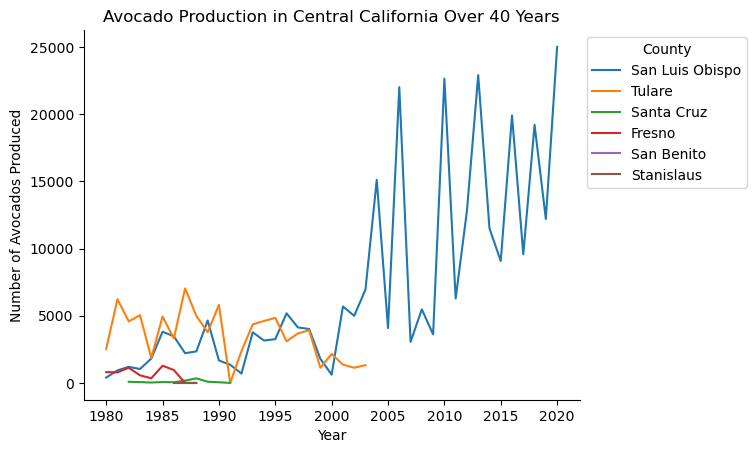

In [10]:
central_avocado_counties
plt.clf()
fig, ax = plt.subplots()

sns.lineplot(data=central_avocado_counties,
             x='Year',
             y='Production',
             hue='County',
             legend='brief')

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
sns.despine(right=True)
ax.set(ylabel='Number of Avocados Produced',
       title='Avocado Production in Central California Over 40 Years',
       xticks=np.arange(0, 45, step=5))

ax.axes.invert_xaxis()



<Figure size 640x480 with 0 Axes>

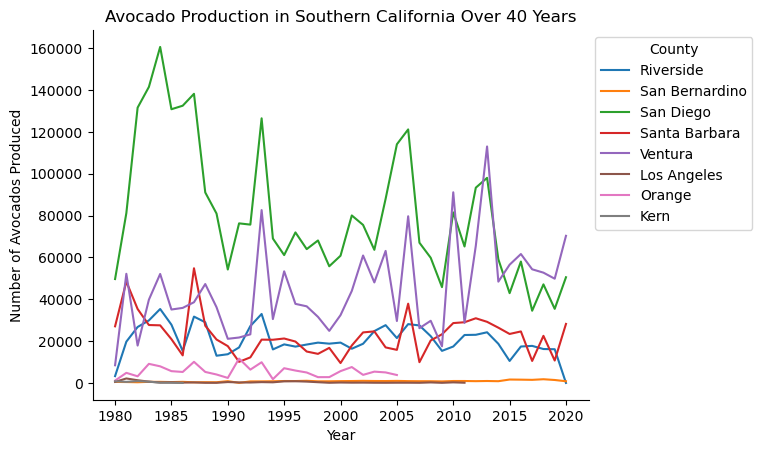

In [11]:
southern_avocado_counties
plt.clf()
fig, ax = plt.subplots()

sns.lineplot(data=southern_avocado_counties,
             x='Year',
             y='Production',
             hue='County',
             legend='brief')

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
sns.despine(right=True)
ax.set(ylabel='Number of Avocados Produced',
       title='Avocado Production in Southern California Over 40 Years',
       xticks=np.arange(0, 45, step=5))

ax.axes.invert_xaxis()


## Analysis